In [1]:
import os
os.chdir('../..')

In [2]:
import comet_ml
import holoviews as hv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mutil.cometml.apiquery import ExperminetInfo

In [3]:
comet_api = comet_ml.api.API()

In [4]:
def get_maxes(SOPT, STR="r", COPT="SGD"):
    project = f"federated-learning-emnistlm/cnn340c1e30r170f-{SOPT}-{STR}-{COPT}"
    all_df = pd.DataFrame()
    for i, exp in enumerate(comet_api.get(project)):
        exp_id = f"{project}/{exp.id}"
        exp = ExperminetInfo(comet_api, exp_id)
        all_df[f"{i}_test_acc"] = exp.get_metrics_df(["test_acc"])["test_acc"]
    return all_df.max(axis=1)

In [5]:
# yay = get_maxes("Yogi", "a", "Yogi")
say = get_maxes("SGD", "a", "Yogi")
# yrs = get_maxes("Yogi")
srs = get_maxes("SGD")


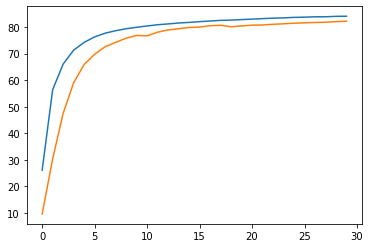

In [6]:
plt.plot(say)
plt.plot(srs)
plt.show()

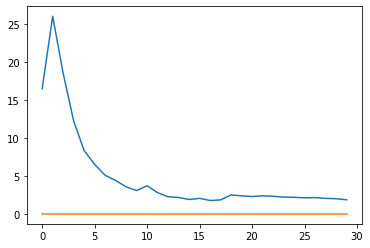

In [7]:
plt.plot(say-srs)
plt.plot(np.zeros(30))
plt.show()

In [8]:
(say-srs).values.argmax()

1